In [ ]:
# 📘 Ad Click Prediction for AdWave Media
print('Hello from YBI Foundation 🚀')

Hello from YBI Foundation 🚀


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Ad Click Prediction for AdWave Media.csv')
df.head()

,Age,Gender,Location,Time on Site (min),Pages Visited,Ad Position,Ad Category,Previous Clicks,Campaign Type,Platform,Hour of Day,"Clicked (1=Yes, 0=No)"
0,50,Male,Semi-Urban,1.19,6,Bottom,Tech,0,Conversion,Desktop,7,0
1,33,Female,Rural,2.51,6,Side,Tech,0,Conversion,Desktop,0,0
2,54,Female,Urban,9.13,12,Top,Food,1,Awareness,Desktop,5,0
3,26,Female,Urban,0.48,11,Top,Food,9,Retargeting,Mobile,14,1
4,64,Female,Urban,6.24,12,Side,Food,5,Conversion,Desktop,15,0


In [ ]:
df.isnull().sum() #The data set is good that there are no null values

,0
Age,0
Gender,0
Location,0
Time on Site (min),0
Pages Visited,0
Ad Position,0
Ad Category,0
Previous Clicks,0
Campaign Type,0
Platform,0


In [ ]:
df.columns

Index(['Age', 'Gender', 'Location', 'Time on Site (min)', 'Pages Visited',
       'Ad Position', 'Ad Category', 'Previous Clicks', 'Campaign Type',
       'Platform', 'Hour of Day', 'Clicked (1=Yes, 0=No)'],
      dtype='object')

In [ ]:
df['Campaign Type'].unique()

array(['Conversion', 'Awareness', 'Retargeting'], dtype=object)

In [ ]:
df['Location'].unique()

array(['Semi-Urban', 'Rural', 'Urban'], dtype=object)

In [ ]:
df['Ad Category'].unique()

array(['Tech', 'Food', 'Travel', 'Finance', 'Fashion'], dtype=object)

In [ ]:
df['Ad Position'].unique()

array(['Bottom', 'Side', 'Top'], dtype=object)

In [ ]:
df['Platform'].unique()

array(['Desktop', 'Mobile', 'Tablet'], dtype=object)

#Convert non-numerical values into numerical values

In [ ]:
#Convert the non numerical data types into numerical data types by using Label encoding where thw order doesn't matter.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Ad Category'] = le.fit_transform(df['Ad Category'])
df['Ad Position'] = le.fit_transform(df['Ad Position'])
df['Platform'] = le.fit_transform(df['Platform'])
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df.head()

,Age,Gender,Location,Time on Site (min),Pages Visited,Ad Position,Ad Category,Previous Clicks,Campaign Type,Platform,Hour of Day,"Clicked (1=Yes, 0=No)"
0,50,1,Semi-Urban,1.19,6,0,3,0,Conversion,0,7,0
1,33,0,Rural,2.51,6,1,3,0,Conversion,0,0,0
2,54,0,Urban,9.13,12,2,2,1,Awareness,0,5,0
3,26,0,Urban,0.48,11,2,2,9,Retargeting,1,14,1
4,64,0,Urban,6.24,12,1,2,5,Conversion,0,15,0


In [ ]:
#Use the Ordinal encoding where you feel that order matters
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [ ]:
df['Location'] = oe.fit_transform(df[['Location']])
df['Campaign Type'] = oe.fit_transform(df[['Campaign Type']])

In [ ]:
df.head()

,Age,Gender,Location,Time on Site (min),Pages Visited,Ad Position,Ad Category,Previous Clicks,Campaign Type,Platform,Hour of Day,"Clicked (1=Yes, 0=No)"
0,50,1,1.0,1.19,6,0,3,0,1.0,0,7,0
1,33,0,0.0,2.51,6,1,3,0,1.0,0,0,0
2,54,0,2.0,9.13,12,2,2,1,0.0,0,5,0
3,26,0,2.0,0.48,11,2,2,9,2.0,1,14,1
4,64,0,2.0,6.24,12,1,2,5,1.0,0,15,0


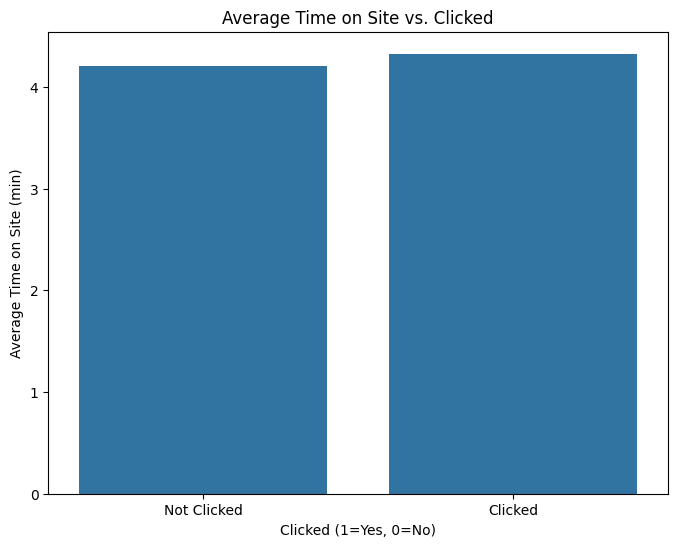

In [ ]:
# Group data by 'Clicked' and calculate the mean of 'Time on Site (min)'
time_on_site_clicked = df.groupby('Clicked (1=Yes, 0=No)')['Time on Site (min)'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Clicked (1=Yes, 0=No)', y='Time on Site (min)', data=time_on_site_clicked)
plt.title('Average Time on Site vs. Clicked')
plt.xlabel('Clicked (1=Yes, 0=No)')
plt.ylabel('Average Time on Site (min)')
plt.xticks(ticks=[0, 1], labels=['Not Clicked', 'Clicked'])
plt.show()

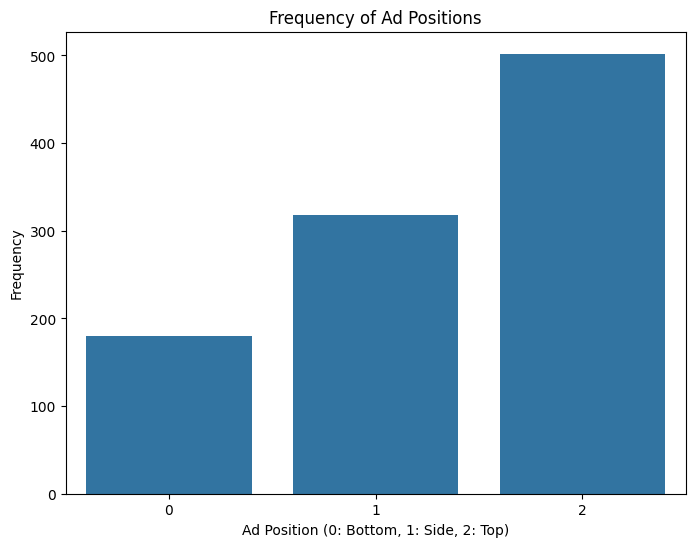

In [ ]:
#let's try to find the relation between ad position and chances of clicking the ad
# Calculate the frequency of each ad position
ad_position_counts = df['Ad Position'].value_counts().reset_index()
ad_position_counts.columns = ['Ad Position', 'Frequency']

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Ad Position', y='Frequency', data=ad_position_counts)
plt.title('Frequency of Ad Positions')
plt.xlabel('Ad Position (0: Bottom, 1: Side, 2: Top)')
plt.ylabel('Frequency')
plt.show()

From the bar plot we can understand that their is a higher chance of clicking the ad if it is on the top of the webiste.

Reasons from my view:
1. attracting the viewer by making it centre of attraction.
2. many of the users don't read the articles or don't view the website till the end. So, there are really low chances for viewing the ad. If it is at the end.

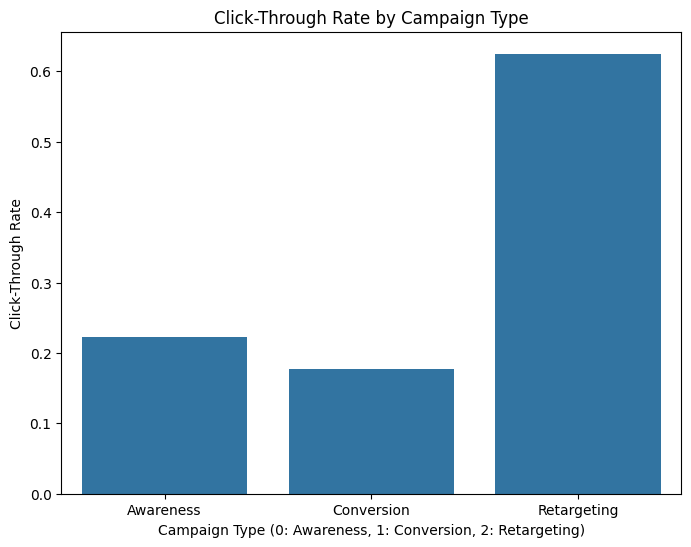

In [ ]:
#Relation between campaign type and clicking the ad.
# Calculate the number of clicks and non-clicks for each campaign type
campaign_clicks = df.groupby('Campaign Type')['Clicked (1=Yes, 0=No)'].value_counts().unstack(fill_value=0)

# Calculate the click-through rate for each campaign type
campaign_clicks['Total'] = campaign_clicks[0] + campaign_clicks[1]
campaign_clicks['CTR'] = campaign_clicks[1] / campaign_clicks['Total']

# Reset index to use 'Campaign Type' as a column for plotting
campaign_clicks = campaign_clicks.reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Campaign Type', y='CTR', data=campaign_clicks)
plt.title('Click-Through Rate by Campaign Type')
plt.xlabel('Campaign Type (0: Awareness, 1: Conversion, 2: Retargeting)')
plt.ylabel('Click-Through Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Awareness', 'Conversion', 'Retargeting'])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   int64  
 2   Location               1000 non-null   float64
 3   Time on Site (min)     1000 non-null   float64
 4   Pages Visited          1000 non-null   int64  
 5   Ad Position            1000 non-null   int64  
 6   Ad Category            1000 non-null   int64  
 7   Previous Clicks        1000 non-null   int64  
 8   Campaign Type          1000 non-null   float64
 9   Platform               1000 non-null   int64  
 10  Hour of Day            1000 non-null   int64  
 11  Clicked (1=Yes, 0=No)  1000 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 93.9 KB


#Split the dataset for training and testing using train_test_split

In [ ]:
from re import X
from sklearn.model_selection import train_test_split
X = df.drop(['Clicked (1=Yes, 0=No)'], axis=1)
y = df['Clicked (1=Yes, 0=No)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

In [ ]:
#As this is a binary classification problem let's import the binary classification models.
#there are models like LogisticRegression, SVM, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingCLassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Let's try first with LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
#let predict the values with unseen dataset
y_pred = lr.predict(X_test)

In [ ]:
#Import the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, y_pred)

0.8133333333333334

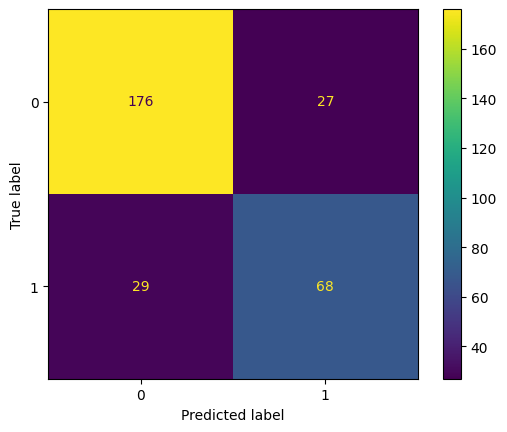

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       203
           1       0.72      0.70      0.71        97

    accuracy                           0.81       300
   macro avg       0.79      0.78      0.79       300
weighted avg       0.81      0.81      0.81       300



In [ ]:
#SVM, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingCLassifier, KNeighborsClassifier, GaussianNB
models = {
    'LogisticRegression': LogisticRegression(max_iter=500), # Logistic Regression was already fitted, but including for completeness
    'SVM': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB()
}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(name)
  print(accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('='*50)
  print('\n')

LogisticRegression
0.8133333333333334
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       203
           1       0.72      0.70      0.71        97

    accuracy                           0.81       300
   macro avg       0.79      0.78      0.79       300
weighted avg       0.81      0.81      0.81       300



SVM
0.6766666666666666
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       203
           1       0.00      0.00      0.00        97

    accuracy                           0.68       300
   macro avg       0.34      0.50      0.40       300
weighted avg       0.46      0.68      0.55       300



DecisionTreeClassifier
0.8633333333333333
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       203
           1       0.79      0.78      0.79        97

    accuracy                           0.86       300
   macro avg       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier
0.87
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       203
           1       0.82      0.77      0.79        97

    accuracy                           0.87       300
   macro avg       0.85      0.84      0.85       300
weighted avg       0.87      0.87      0.87       300



AdaBoostClassifier
0.8966666666666666
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       203
           1       0.88      0.79      0.83        97

    accuracy                           0.90       300
   macro avg       0.89      0.87      0.88       300
weighted avg       0.90      0.90      0.90       300



GradientBoostingClassifier
0.9
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       203
           1       0.84      0.86      0.85        97

    accuracy                           0.90       300
   macro avg       0.88    

From all the above models GradientBoostingClassifier gave us the highest accuracy

#Accuracies comparison graphs among the models

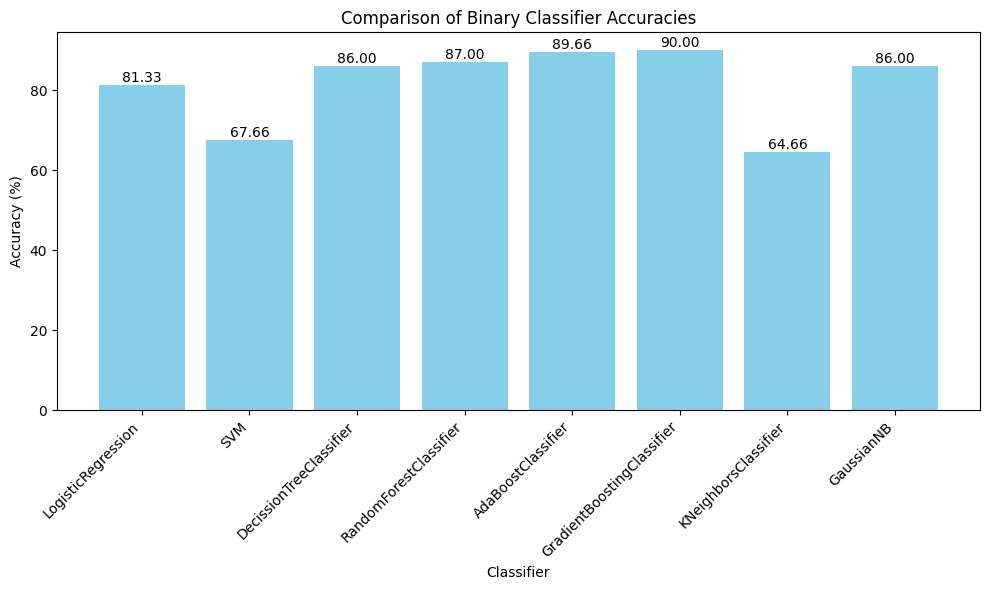

In [ ]:
# Provided dictionary of models and their corresponding accuracy values
performance_dict = {
    'LogisticRegression': 81.33,
    'SVM': 67.66,
    'DecissionTreeClassifier': 86,
    'RandomForestClassifier': 87,
    'AdaBoostClassifier': 89.66,
    'GradientBoostingClassifier': 90,
    'KNeighborsClassifier': 64.66,
    'GaussianNB': 86
}

# Extracting model names and their accuracy scores
models = list(performance_dict.keys())
accuracies = list(performance_dict.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')

# Adding titles and labels
plt.title('Comparison of Binary Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding value labels on top of each bar for clarity
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, height,
        f'{height:.2f}', ha='center', va='bottom'
    )

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()